### Code installing and data generation

In [48]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from math import log, floor, exp

class Analysis():
    def computeLogReturns(self, back, ahead):
        return np.divide(back, ahead).map(log)
    
    def generateGaussians(self, mean=100, std=1, n=1000):
        return np.random.normal(mean, std, n)
    
    def leadingDigit(self, x):
        absx = abs(x)
        return floor(float(absx) / pow(10, floor(log(absx))))
    

analysis = Analysis()

#Problem 1 Stuff
GSPCdata = pd.read_csv('./data/GSPC_historical_prices.csv')
GSPCvalues = GSPCdata['Adj Close']

#Gaussians
gaussians = analysis.generateGaussians()
gaussianRets = analysis.computeLogReturns(pd.Series(gaussians[:-1]), pd.Series(gaussians[1:]))
sortedGaussianRets = gaussianRets.sort_values(ascending=False)[0:len(gaussianRets)]
logRanks1000 = pd.Series(xrange(1,len(gaussianRets) + 1)).map(log)

times = pd.to_datetime(GSPCdata['Date'])
timesOffByOne = times[1:]

#Stock Data
logRets = analysis.computeLogReturns(GSPCvalues[:-1], GSPCvalues[1:])
sortedLogReturns1 = logRets.sort_values(ascending=False)[0:len(logRets)]
sortedLogReturns = sortedLogReturns1
logRanks = pd.Series(xrange(1,len(sortedLogReturns) + 1)).map(log)



#Problem 2 stuff
popData = pd.read_csv('./data/PEP_2014_PEPANNRSIP.US12A_with_ann.csv')
citiesAndPopulation = popData[['GC_RANK.display-label.1', 'respop72014']]
population = popData['respop72014']
logXs = pd.Series(xrange(1, len(population))).map(log)
logPops = population[1:len(population)].map(log)

## Problem 1

#### Log fluctuations on stock prices

Receiving the historical closing prices of GSPC, here is a plot of the price values. We see a steady increase since 1953.

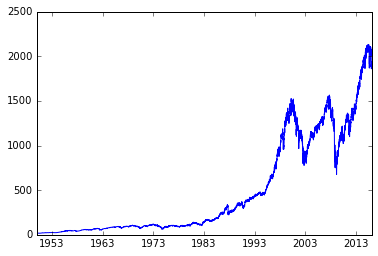

In [49]:
plt.plot(times, GSPCvalues)

Below is a plot of log returns. We see the characteristic large fluctuations signalling the possibility of a power law for the distribution of returns.

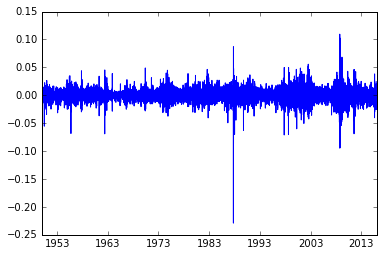

In [50]:
plt.plot(timesOffByOne, logRets)

Below is a plot of Gaussian distributed fluctuations. We see random jumps near the mean, but at far
lower orders of magnitude compared to above.

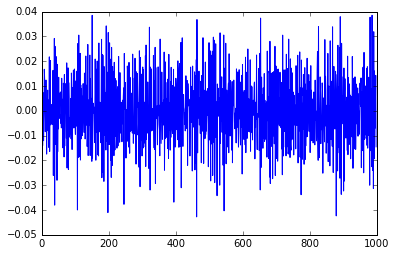

In [51]:
plt.plot(gaussianRets)

## Problem 2

#### Zipf's law and curve fitting power laws to Population data

Zipf's law 

$ r^{b} f = a $

is applicable to power law relationships between ranks and outcomes. We discussed power laws and emergence in physical systems with no natural pressure to reduce outcomes. In real world systems like city populations or incomes we see these power law relationships. By applying a log transform to the Zipf's law formula, we have 

$ 2. \log f = \log a + b \log r $

allowing us to apply a linear curve fit and find coefficients $ b $ and $ a $. Below is a plot for US census 2014 population data.


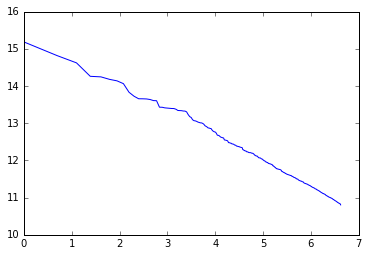

In [52]:

plt.plot(logXs, logPops)


Here there are 752 cities, ranked using a log transform on the population and rank. We see a visible linear relationship that suggests the rank and population are power law related. Curve fitting we find...

In [53]:
slope, intercept, r_value, p_value, std_err = stats.linregress(logXs, logPops)
print slope
print exp(intercept)

-0.706898904192
5570865.89135


#### Zipf's law and curve fitting power laws to price fluctuations

Let's now generate a log-log rank plot on the log-returns from Problem 1.

16625

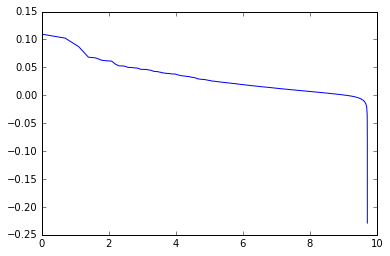

In [54]:
plt.plot(logRanks, sortedLogReturns)

We can see a linear curve approximately until around 8000, since there is a massive drop off in the tail. Taking only the first 8000 samples we can curve fit and find the b exponent.

In [57]:
slopeRets, interceptRets, r_value2, p_value2, std_err2 = stats.linregress(logRanks[:8000], sortedLogReturns[:8000])
print slopeRets
print std_err2
print interceptRets

-0.00662833760956
1.32186779577e-05
0.0600298571128


Comparing to the Gaussian returns plot below, we see in the plot below drop of around an order of magnitude in the value of the rank, with the scale around a similar order of magnitude around .01.

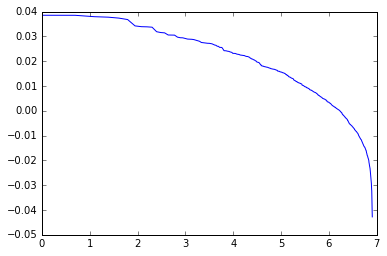

In [56]:
plt.plot(logRanks1000, sortedGaussianRets)